# 🚀 Quick Club Analysis
## Fast Insights from Your Club Data

This notebook provides quick analysis of your Club_Table.xlsx file.

In [ ]:
# Install packages if needed
# !pip install pandas openpyxl matplotlib seaborn plotly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('✅ Libraries loaded!')

✅ Libraries loaded!


## 📂 Load Your Club Data
**Update the file path below to your Club_Table.xlsx location**

In [2]:
# UPDATE THIS PATH
FILE_PATH = r"C:\Users\pavan_kalbhat\Desktop\Folders Home\Excel sheets for Power Bi Practice\BI Developer Sample Dataset\BI Developer Sample Dataset (1).xlsx"

# Load data
df = pd.read_excel(FILE_PATH)

print(f'✅ Loaded {len(df)} clubs')
print(f'\nColumns: {list(df.columns)}')
print(f'\nFirst few rows:')
display(df.head())

✅ Loaded 28 clubs

Columns: ['Club_Key', 'address1', 'city', 'ClubNumber', 'postalCode', 'state', 'ClubStartDt', 'ClubOpenedDt', 'Club Name', 'Netsuite', 'ABC', 'District', 'CIP_G_L', 'Presale_Date', 'Date_Opened', 'Date_Closed', 'Year_Opened', 'Sq_Ft', 'Box']

First few rows:


,Club_Key,address1,city,ClubNumber,postalCode,state,ClubStartDt,ClubOpenedDt,Club Name,Netsuite,ABC,District,CIP_G_L,Presale_Date,Date_Opened,Date_Closed,Year_Opened,Sq_Ft,Box
0,16,3693 S 16th St,Tucson,5513,85713,AZ,2016-05-23,2016-06-06,Club 1,1017,5513,Tucson,NaN,NaT,2016-06-06,NaN,2016,19000,Small Box
1,31,409 West Felicita Ave.,Escondido,5583,92025,CA,2014-01-01,2009-12-18,Club 2,1002,5583,San Diego,NaN,NaT,2009-12-18,NaN,2009,16221,Small Box
2,17,8601 N Sheridan BLVD STE 500,Westminster,5522,80003,CO,2016-08-05,2016-07-27,Club 3,1019,5522,North Denver,NaN,NaT,2016-07-27,NaN,2016,37410,Big Box
3,34,215 Town Center Pkwy,Santee,5588,92071,CA,2014-01-01,2010-01-05,Club 4,1003,5588,San Diego,NaN,NaT,2010-01-05,NaN,2010,21500,Small Box
4,32,1233 Camino Del Rio S.,San Diego,5585,92108,CA,2014-01-01,2010-10-21,Club 5,1004,5585,San Diego,NaN,NaT,2010-10-21,NaN,2010,17864,Small Box


## 📊 Quick Statistics

In [3]:
print('='*60)
print('QUICK STATS')
print('='*60)
print(f'\nTotal Clubs: {len(df)}')
print(f'States: {df["state"].nunique()}')
print(f'Districts: {df["District"].nunique()}')
print(f'\nTotal Square Footage: {df["Sq_Ft"].sum():,} sq ft')
print(f'Average Club Size: {df["Sq_Ft"].mean():,.0f} sq ft')
print(f'Largest Club: {df["Sq_Ft"].max():,} sq ft')
print(f'Smallest Club: {df["Sq_Ft"].min():,} sq ft')

print(f'\nActive Clubs: {df["Date_Closed"].isna().sum()}')
print(f'Closed Clubs: {df["Date_Closed"].notna().sum()}')

print(f'\nYears in Operation: {df["Year_Opened"].min()} - {df["Year_Opened"].max()}')
print(f'Peak Opening Year: {df["Year_Opened"].mode()[0]} ({df["Year_Opened"].value_counts().max()} clubs)')

QUICK STATS

Total Clubs: 28
States: 4
Districts: 7

Total Square Footage: 933,375 sq ft
Average Club Size: 33,335 sq ft
Largest Club: 52,000 sq ft
Smallest Club: 16,221 sq ft

Active Clubs: 28
Closed Clubs: 0

Years in Operation: 2009 - 2019
Peak Opening Year: 2019 (8 clubs)


## 🗺️ Geographic Distribution

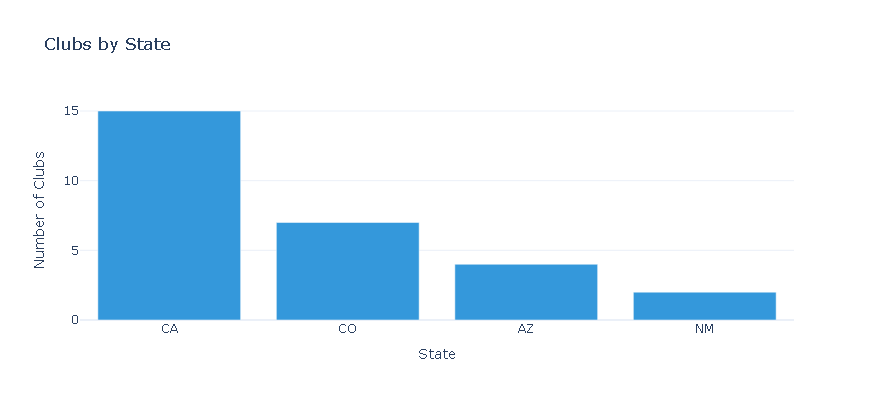


Clubs by State:


state
CA    15
CO     7
AZ     4
NM     2
Name: count, dtype: int64

In [4]:
# Clubs by state
state_counts = df['state'].value_counts()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=state_counts.index,
    y=state_counts.values,
    marker=dict(color='#3498db')
))

fig.update_layout(
    title='Clubs by State',
    xaxis_title='State',
    yaxis_title='Number of Clubs',
    height=400,
    template='plotly_white'
)

fig.show()

print('\nClubs by State:')
display(state_counts)

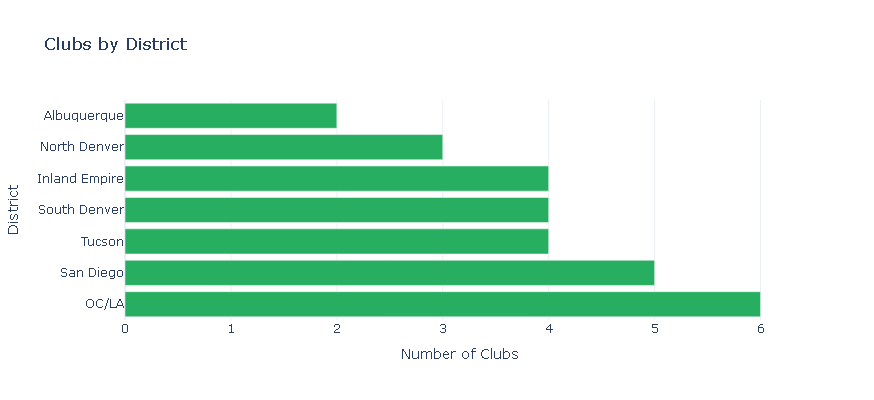

In [5]:
# Clubs by district
district_counts = df['District'].value_counts()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=district_counts.values,
    y=district_counts.index,
    orientation='h',
    marker=dict(color='#27ae60')
))

fig.update_layout(
    title='Clubs by District',
    xaxis_title='Number of Clubs',
    yaxis_title='District',
    height=400,
    template='plotly_white'
)

fig.show()

## 📏 Club Size Analysis

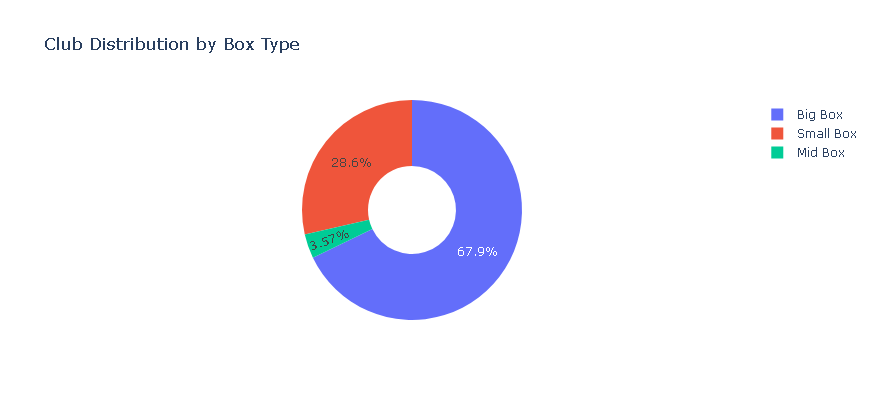


Box Type Distribution:


Box
Big Box      19
Small Box     8
Mid Box       1
Name: count, dtype: int64

In [6]:
# Box type distribution
box_counts = df['Box'].value_counts()

fig = go.Figure()
fig.add_trace(go.Pie(
    labels=box_counts.index,
    values=box_counts.values,
    hole=0.4
))

fig.update_layout(
    title='Club Distribution by Box Type',
    height=400
)

fig.show()

print('\nBox Type Distribution:')
display(box_counts)


Average Size by Box Type:


,mean,min,max
Box,,,
Big Box,39529.0,31671,52000
Mid Box,32000.0,32000,32000
Small Box,18790.0,16221,21500


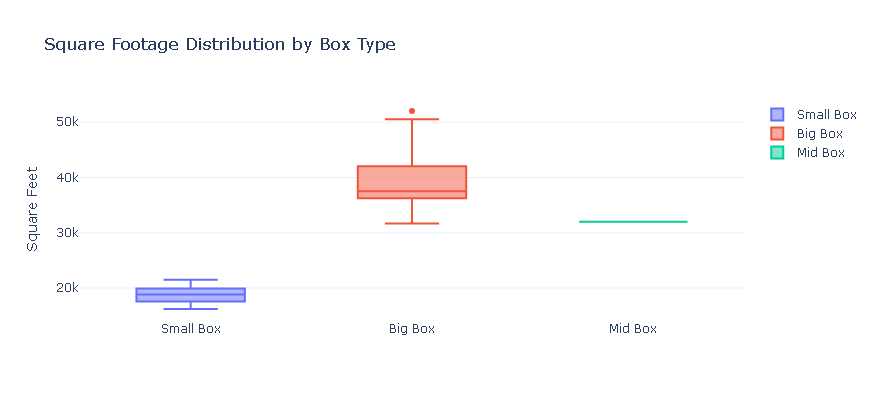

In [7]:
# Average size by box type
avg_size_by_box = df.groupby('Box')['Sq_Ft'].agg(['mean', 'min', 'max']).round(0)

print('\nAverage Size by Box Type:')
display(avg_size_by_box)

# Visualization
fig = go.Figure()
for box_type in df['Box'].unique():
    box_data = df[df['Box'] == box_type]['Sq_Ft']
    fig.add_trace(go.Box(
        y=box_data,
        name=box_type
    ))

fig.update_layout(
    title='Square Footage Distribution by Box Type',
    yaxis_title='Square Feet',
    height=400,
    template='plotly_white'
)

fig.show()

## 📅 Timeline Analysis

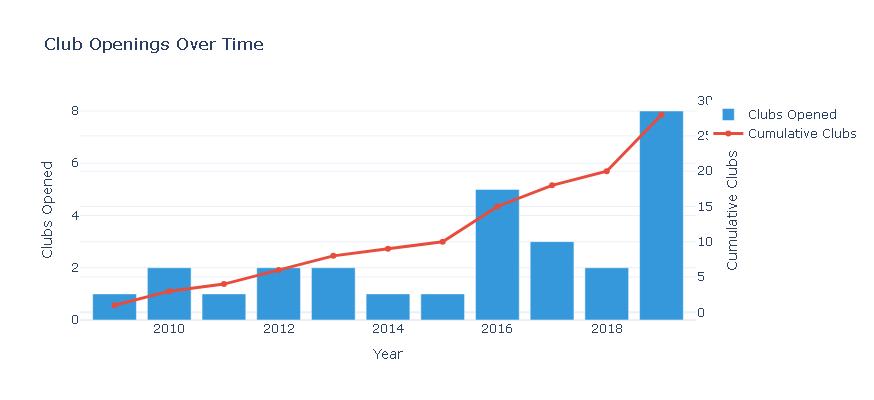


Clubs Opened by Year:


Year_Opened
2009    1
2010    2
2011    1
2012    2
2013    2
2014    1
2015    1
2016    5
2017    3
2018    2
2019    8
Name: count, dtype: int64

In [8]:
# Clubs opened per year
year_counts = df['Year_Opened'].value_counts().sort_index()

fig = go.Figure()

# Bar chart - clubs per year
fig.add_trace(go.Bar(
    x=year_counts.index,
    y=year_counts.values,
    name='Clubs Opened',
    marker=dict(color='#3498db')
))

# Line chart - cumulative
fig.add_trace(go.Scatter(
    x=year_counts.index,
    y=year_counts.cumsum(),
    name='Cumulative Clubs',
    mode='lines+markers',
    line=dict(color='#e74c3c', width=3),
    yaxis='y2'
))

fig.update_layout(
    title='Club Openings Over Time',
    xaxis_title='Year',
    yaxis_title='Clubs Opened',
    yaxis2=dict(
        title='Cumulative Clubs',
        overlaying='y',
        side='right'
    ),
    height=400,
    template='plotly_white',
    hovermode='x unified'
)

fig.show()

print('\nClubs Opened by Year:')
display(year_counts)

## 🏆 Top Performers

In [9]:
# Largest clubs
print('\n🏢 Top 10 Largest Clubs:')
largest = df.nlargest(10, 'Sq_Ft')[['Club Name', 'state', 'Box', 'Sq_Ft']]
display(largest)

# Smallest clubs
print('\n🏢 Top 10 Smallest Clubs:')
smallest = df.nsmallest(10, 'Sq_Ft')[['Club Name', 'state', 'Box', 'Sq_Ft']]
display(smallest)


🏢 Top 10 Largest Clubs:


,Club Name,state,Box,Sq_Ft
22,Club 23,CO,Big Box,52000
26,Club 27,CO,Big Box,50511
18,Club 19,CA,Big Box,44800
16,Club 17,CA,Big Box,43665
23,Club 24,NM,Big Box,42680
19,Club 20,CA,Big Box,40000
25,Club 26,CO,Big Box,40000
27,Club 28,NM,Big Box,40000
20,Club 21,CO,Big Box,37500
21,Club 22,CA,Big Box,37500



🏢 Top 10 Smallest Clubs:


,Club Name,state,Box,Sq_Ft
1,Club 2,CA,Small Box,16221
13,Club 14,CA,Small Box,17253
4,Club 5,CA,Small Box,17864
9,Club 10,AZ,Small Box,18650
0,Club 1,AZ,Small Box,19000
6,Club 7,CA,Small Box,19788
12,Club 13,CA,Small Box,20048
3,Club 4,CA,Small Box,21500
17,Club 18,CA,Big Box,31671
5,Club 6,CA,Mid Box,32000


## 💰 Financial Data (CIP_G_L)

In [10]:
# CIP_G_L analysis
cip_available = df['CIP_G_L'].notna().sum()
cip_missing = df['CIP_G_L'].isna().sum()

print(f'\nCIP_G_L Data Availability:')
print(f'  Available: {cip_available} clubs ({cip_available/len(df)*100:.1f}%)')
print(f'  Missing: {cip_missing} clubs ({cip_missing/len(df)*100:.1f}%)')

if cip_available > 0:
    print(f'\nCIP_G_L Statistics (for clubs with data):')
    print(f'  Average: ${df["CIP_G_L"].mean():,.2f}')
    print(f'  Median: ${df["CIP_G_L"].median():,.2f}')
    print(f'  Total: ${df["CIP_G_L"].sum():,.2f}')


CIP_G_L Data Availability:
  Available: 8 clubs (28.6%)
  Missing: 20 clubs (71.4%)

CIP_G_L Statistics (for clubs with data):
  Average: $1,286.75
  Median: $1,286.50
  Total: $10,294.00


## 📊 Summary Table by State

In [11]:
# Summary by state
state_summary = df.groupby('state').agg({
    'ClubNumber': 'count',
    'Sq_Ft': ['sum', 'mean'],
    'Year_Opened': ['min', 'max']
}).round(0)

state_summary.columns = ['Clubs', 'Total_Sq_Ft', 'Avg_Sq_Ft', 'First_Opened', 'Last_Opened']
state_summary = state_summary.sort_values('Clubs', ascending=False)

print('\n📊 Summary by State:')
display(state_summary.style.format({
    'Total_Sq_Ft': '{:,.0f}',
    'Avg_Sq_Ft': '{:,.0f}',
    'First_Opened': '{:.0f}',
    'Last_Opened': '{:.0f}'
}))


📊 Summary by State:


,Clubs,Total_Sq_Ft,Avg_Sq_Ft,First_Opened,Last_Opened
state,,,,,
CA,15,"452,228","30,149",2009,2019
CO,7,"288,421","41,203",2016,2019
AZ,4,"110,046","27,512",2012,2019
NM,2,"82,680","41,340",2019,2019


## 💡 Key Insights

In [12]:
print('\n' + '='*60)
print('KEY INSIGHTS')
print('='*60)

# Top state
top_state = df['state'].value_counts().idxmax()
top_state_count = df['state'].value_counts().max()
print(f'\n1. Geographic Concentration:')
print(f'   {top_state} dominates with {top_state_count} clubs ({top_state_count/len(df)*100:.1f}% of portfolio)')

# Box type preference
top_box = df['Box'].value_counts().idxmax()
top_box_count = df['Box'].value_counts().max()
print(f'\n2. Size Strategy:')
print(f'   Portfolio favors {top_box} format ({top_box_count} clubs, {top_box_count/len(df)*100:.1f}%)')

# Peak year
peak_year = df['Year_Opened'].mode()[0]
peak_count = df['Year_Opened'].value_counts().max()
print(f'\n3. Growth Pattern:')
print(f'   Peak expansion in {peak_year} with {peak_count} new clubs')

# Health
retention_rate = df['Date_Closed'].isna().sum() / len(df) * 100
print(f'\n4. Portfolio Health:')
print(f'   {retention_rate:.1f}% retention rate (all clubs still active)' if retention_rate == 100 else f'   {retention_rate:.1f}% retention rate')

# Data quality
cip_coverage = df['CIP_G_L'].notna().sum() / len(df) * 100
print(f'\n5. Data Quality:')
print(f'   CIP_G_L data available for {cip_coverage:.1f}% of clubs')
print(f'   Presale data available for {df["Presale_Date"].notna().sum()} clubs')


KEY INSIGHTS

1. Geographic Concentration:
   CA dominates with 15 clubs (53.6% of portfolio)

2. Size Strategy:
   Portfolio favors Big Box format (19 clubs, 67.9%)

3. Growth Pattern:
   Peak expansion in 2019 with 8 new clubs

4. Portfolio Health:
   100.0% retention rate (all clubs still active)

5. Data Quality:
   CIP_G_L data available for 28.6% of clubs
   Presale data available for 5 clubs


## 💾 Export Results

In [13]:
# Export enhanced club data
df_export = df.copy()
df_export['IsActive'] = df_export['Date_Closed'].isna()
df_export['Years_In_Operation'] = ((datetime.now() - pd.to_datetime(df_export['Date_Opened'])).dt.days / 365.25).round(1)

output_file = 'club_analysis_enhanced.xlsx'
df_export.to_excel(output_file, index=False)
print(f'\n✅ Enhanced club data exported to: {output_file}')


✅ Enhanced club data exported to: club_analysis_enhanced.xlsx
